In [1]:
#Install required libraries
!pip install tensorflow
!pip install numpy
!pip install sklearn

     |████████████████████████████████| 3.2MB 9.7MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [2]:
#Load Data from the MNIST Dataset
import pickle
import numpy as np
import tensorflow as tf
from sklearn import svm, datasets

mnist = tf.keras.datasets.mnist  
(x_train, y_train), (x_test, y_test) = mnist.load_data()
    
print(type(x_train), x_train.size, x_train.shape)
print(type(y_train), y_train.size, y_train.shape)
print(type(x_test), x_test.size, x_test.shape)
print(type(y_test), y_test.size, y_test.shape)
print(y_train[55], y_test[583])

11493376/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'> 47040000 (60000, 28, 28)
<class 'numpy.ndarray'> 60000 (60000,)
<class 'numpy.ndarray'> 7840000 (10000, 28, 28)
<class 'numpy.ndarray'> 10000 (10000,)
8 2


In [3]:
#Visualize Data with Matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt

plt.imshow(x_train[55].reshape(28, 28), cmap=cm.Greys)

<function matplotlib.pyplot.show(*args, **kw)>

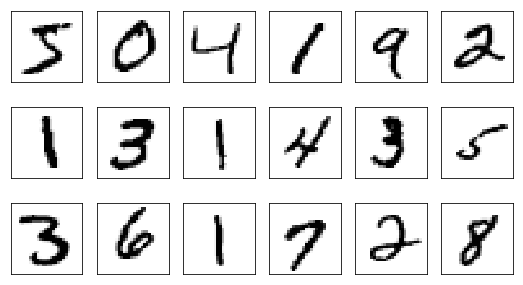

In [4]:
#Plot the Sample Data
images = x_train[0:18]
fig, axes = plt.subplots(3, 6, figsize=[9,5])

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i].reshape(28, 28), cmap=cm.Greys)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show

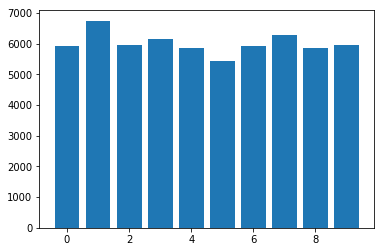

[5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


In [5]:
#Correlation between Data
counts = np.bincount(y_train)
nums = np.arange(len(counts))
plt.bar(nums, counts)
plt.show()
print(counts)

In [6]:
#Build a Neural Network with TensorFlow
import tensorflow as tf
# Disable some deprecated error messages
tf.logging.set_verbosity(tf.logging.ERROR)

# Normalize the data for faster processing
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4)

Epoch 1/4
60000/60000 [==============================] - 35s 590us/sample - loss: 0.2554 - acc: 0.9252
Epoch 2/4
60000/60000 [==============================] - 34s 560us/sample - loss: 0.1218 - acc: 0.9634
Epoch 3/4
60000/60000 [==============================] - 35s 575us/sample - loss: 0.0884 - acc: 0.9731
Epoch 4/4
60000/60000 [==============================] - 34s 562us/sample - loss: 0.0714 - acc: 0.9768


[2.7417366e-07 1.0570180e-06 2.6248015e-06 9.6575968e-07 9.9964011e-01
 1.6812328e-05 2.6853164e-05 2.4937503e-05 9.5870666e-05 1.9054144e-04]
6


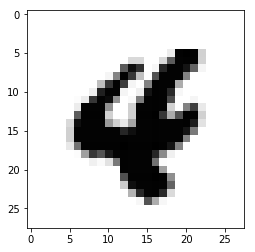

In [7]:
#Run predictions of the Test Dataset
predictions = model.predict(x_test)
print(predictions[95])
print(np.argmax(predictions[88]))
plt.imshow(x_test[95].reshape(28, 28), cmap=cm.Greys)

In [8]:
#Evaluate Model Performance

pfc=model.evaluate(x_test, y_test)
print("Model Performance Score:",pfc)

10000/10000 [==============================] - 3s 258us/sample - loss: 0.0711 - acc: 0.9782
Model Performance Score: [0.07112394888550043, 0.9782]
